# Phân Tích Dữ Liệu Khám Phá (Exploratory Data Analysis) với Pandas

**Bài giảng dành cho sinh viên ngành Công nghệ Thông tin & Khoa học máy tính**

---

## Giới thiệu

Phân tích dữ liệu khám phá (EDA - Exploratory Data Analysis) là bước quan trọng đầu tiên trong bất kỳ dự án khoa học dữ liệu nào. EDA giúp chúng ta hiểu cấu trúc dữ liệu, phát hiện các mẫu (patterns), xác định các giá trị bất thường (outliers), và kiểm tra các giả thuyết ban đầu trước khi áp dụng các mô hình học máy phức tạp.

**Pandas** là thư viện Python mạnh mẽ giúp phân tích dữ liệu dạng bảng một cách dễ dàng và hiệu quả.

### Mục tiêu bài học

Sau khi hoàn thành bài học này, sinh viên sẽ:

1. Hiểu được cấu trúc dữ liệu cơ bản trong Pandas (Series và DataFrame)
2. Biết cách đọc và khám phá dữ liệu ban đầu
3. Thành thạo các phương pháp sắp xếp và lọc dữ liệu
4. Áp dụng hàm lên các cột, hàng và ô dữ liệu
5. Thực hiện nhóm dữ liệu (grouping) và tạo bảng tổng hợp
6. Biến đổi DataFrame theo nhu cầu phân tích
7. Thực hành phân tích trên bộ dữ liệu thực tế

## Phần 1: Cài đặt và Import thư viện

Trước tiên, chúng ta cần import các thư viện cần thiết.

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd

# Cài đặt hiển thị số thập phân với 2 chữ số
pd.set_option("display.precision", 2)

# Hiển thị tối đa 100 cột và 100 hàng
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

Pandas version: 2.3.3
NumPy version: 2.2.6


## Phần 2: Cấu trúc dữ liệu cơ bản trong Pandas

### 2.1 Series

**Series** là mảng một chiều có chỉ mục (index), chứa dữ liệu cùng một kiểu.

In [ ]:
# Tạo Series từ list (như một mảng 1 chiều có biến và dữ liệu)
#khi truy cập theo index
diem_so = pd.Series([8.5, 7.0, 9.0, 6.5, 8.0], 
                    index=['An', 'Bình', 'Cường', 'Dung', 'Em'])
print("Series điểm số:")
print(diem_so)
print("\nKiểu dữ liệu:", diem_so.dtype)
print("Số phần tử:", len(diem_so))

Series điểm số:
An       8.5
Bình     7.0
Cường    9.0
Dung     6.5
Em       8.0
dtype: float64

Kiểu dữ liệu: float64
Số phần tử: 5


In [4]:
# Truy cập phần tử trong Series
print("Điểm của Cường:", diem_so['Cường'])
print("Điểm trung bình:", diem_so.mean())
print("Điểm cao nhất:", diem_so.max())

Điểm của Cường: 9.0
Điểm trung bình: 7.8
Điểm cao nhất: 9.0


### 2.2 DataFrame

**DataFrame** là cấu trúc dữ liệu hai chiều dạng bảng, trong đó mỗi cột là một Series. Đây là cấu trúc dữ liệu được sử dụng nhiều nhất trong Pandas.

In [ ]:
# Tạo DataFrame từ dictionary (cấu trúc 2 chiều dạng mảng)
data = { # tạo bảng dữ liệu dictionary sinh viên
    'Họ tên': ['Nguyễn An', 'Trần Bình', 'Lê Cường', 'Phạm Dung', 'Hoàng Em'],
    'Tuổi': [20, 21, 19, 22, 20],
    'Điểm Toán': [8.5, 7.0, 9.0, 6.5, 8.0],
    'Điểm Lý': [7.5, 8.0, 8.5, 7.0, 9.0],
    'Giới tính': ['Nam', 'Nam', 'Nam', 'Nữ', 'Nữ']
}

df_sv = pd.DataFrame(data)
print("DataFrame sinh viên:")
df_sv

DataFrame sinh viên:


,Họ tên,Tuổi,Điểm Toán,Điểm Lý,Giới tính
0,Nguyễn An,20,8.5,7.5,Nam
1,Trần Bình,21,7.0,8.0,Nam
2,Lê Cường,19,9.0,8.5,Nam
3,Phạm Dung,22,6.5,7.0,Nữ
4,Hoàng Em,20,8.0,9.0,Nữ


## Phần 3: Đọc và Khám phá Dữ liệu

### 3.1 Đọc dữ liệu từ file CSV

Chúng ta sẽ sử dụng bộ dữ liệu về tỷ lệ khách hàng rời bỏ (churn) của một nhà mạng viễn thông.

In [15]:
# Đọc dữ liệu từ URL
#DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
DATA_URL = "./input/" # đường dẫn thư mục chạy trong chính ổ đĩa của mình 
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

# Xem 5 dòng đầu tiên
print("5 dòng đầu tiên của dữ liệu:") # gọi để xem 5 dòng đầu tiên
df.head(5) # hiển thị 5 dòng đầu tiên

5 dòng đầu tiên của dữ liệu:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Xem 5 dòng cuối cùng
print("5 dòng cuối cùng của dữ liệu:")
df.tail() # hiển thị 5 dòng cuối cùng

5 dòng cuối cùng của dữ liệu:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


### 3.2 Khám phá cấu trúc dữ liệu

In [18]:
# Kích thước DataFrame (số hàng, số cột)
print("Kích thước dữ liệu:", df.shape)
print(f"Số hàng: {df.shape[0]}, Số cột: {df.shape[1]}") # truy cập số hàng và số cột

Kích thước dữ liệu: (3333, 20)
Số hàng: 3333, Số cột: 20


In [ ]:
# Tên các cột
print("Danh sách các cột:")
print(df.columns.tolist()) #xem hay truy xuất tên các cột dùng tolist trả về danh sách

Danh sách các cột:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [ ]:
# Thông tin tổng quan về DataFrame
print("Thông tin về DataFrame:")
df.info() # để xem thông tin tổng quan về DataFrame

Thông tin về DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night char

**Giải thích các kiểu dữ liệu:**
- `int64`: Số nguyên 64-bit
- `float64`: Số thực 64-bit
- `object`: Chuỗi ký tự (string)
- `bool`: Giá trị logic (True/False)

In [ ]:
# Chuyển đổi kiểu dữ liệu của cột Churn từ bool sang int64
df["Churn"] = df["Churn"].astype("int64") # df chuyển đổi kiểu dữ liệu
print("Kiểu dữ liệu của cột Churn sau khi chuyển đổi:", df["Churn"].dtype)

Kiểu dữ liệu của cột Churn sau khi chuyển đổi: int64


### 3.3 Thống kê mô tả

Phương thức `describe()` cung cấp các thống kê cơ bản cho các cột số.

In [ ]:
# Thống kê mô tả cho các cột số
print("Thống kê mô tả:")
df.describe() #thống kê mô tả cho các cột số

Thống kê mô tả:


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


**Giải thích các chỉ số:**
- `count`: Số lượng giá trị không null
- `mean`: Giá trị trung bình
- `std`: Độ lệch chuẩn
- `min`: Giá trị nhỏ nhất
- `25%`, `50%`, `75%`: Các phân vị (quartiles)
- `max`: Giá trị lớn nhất

In [22]:
# Thống kê mô tả cho các cột không phải số
print("Thống kê cho các cột object và bool:")
df.describe(include=["object", "bool"])

Thống kê cho các cột object và bool:


,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


### 3.4 Đếm giá trị với value_counts()

In [ ]:
# Phân bố giá trị của cột Churn
print("Phân bố khách hàng theo Churn:") # xem phân bố khách hàng theo cột Churn
print(df["Churn"].value_counts())

print("\nTỷ lệ phần trăm:")
print(df["Churn"].value_counts(normalize=True))

Phân bố khách hàng theo Churn:
Churn
0    2850
1     483
Name: count, dtype: int64

Tỷ lệ phần trăm:
Churn
0    0.86
1    0.14
Name: proportion, dtype: float64


In [ ]:
# Phân bố theo State (Bang)
print("Top 10 bang có nhiều khách hàng nhất:")
print(df["State"].value_counts().head(10)) #xem danh sách 10 bang có nhiều khách hàng nhất

Top 10 bang có nhiều khách hàng nhất:
State
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
Name: count, dtype: int64


## Phần 4: Sắp xếp dữ liệu (Sorting)

Phương thức `sort_values()` cho phép sắp xếp DataFrame theo một hoặc nhiều cột.

In [45]:
# Sắp xếp theo Total day charge (giảm dần)
print("Top 5 khách hàng có cước phí ngày cao nhất:")
df.sort_values(by="Total day charge", ascending=False).head()

Top 5 khách hàng có cước phí ngày cao nhất:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [47]:
# Sắp xếp theo nhiều cột
print("Sắp xếp theo Churn (tăng dần) và Total day charge (giảm dần):")
df.sort_values(by=["Churn", "Total day charge"],  #dùng 1 list để sắp xếp nhiều cột
               ascending=[True, False]).head()

Sắp xếp theo Churn (tăng dần) và Total day charge (giảm dần):


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### Bài tập thực hành 1

Hãy sắp xếp dữ liệu theo cột `Account length` tăng dần và hiển thị 10 dòng đầu tiên.

In [44]:
# Viết code của bạn ở đây
#sap xep account length tang dan va in 10 dong dau tien
print("hien thi 10 khach hang dau tien:")
df.sort_values(by="Account length", ascending=True).head(10)



hien thi 10 khach hang dau tien:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1409,NJ,1,415,No,Yes,30,183.1,95,31.13,232.6,110,19.77,248.3,110,11.17,8.4,2,2.27,0,0
923,MS,1,415,No,No,0,144.8,107,24.62,112.5,66,9.56,218.7,79,9.84,13.8,3,3.73,1,0
2879,SC,1,415,No,Yes,26,146.6,68,24.92,172.8,67,14.69,173.8,113,7.82,10.0,2,2.70,1,0
2960,TX,1,415,No,No,0,182.1,106,30.96,134.9,106,11.47,152.3,75,6.85,10.0,3,2.70,5,1
1490,TN,1,415,No,No,0,196.1,107,33.34,296.5,82,25.20,211.5,91,9.52,7.0,2,1.89,1,0
2423,SC,1,408,No,No,0,123.8,113,21.05,236.2,77,20.08,73.2,81,3.29,3.7,2,1.00,0,0
1838,IA,1,408,No,Yes,26,208.0,115,35.36,185.0,113,15.73,177.7,144,8.00,8.1,9,2.19,1,0
2475,AK,1,408,No,No,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,0
1322,DE,2,415,Yes,No,0,132.1,42,22.46,138.9,88,11.81,192.6,119,8.67,9.1,1,2.46,2,1
2801,HI,3,408,No,No,0,139.0,99,23.63,250.7,108,21.31,286.2,87,12.88,6.1,3,1.65,4,0


## Phần 5: Lập chỉ mục và Truy xuất dữ liệu (Indexing)

### 5.1 Truy cập cột

In [49]:
# Truy cập một cột bằng tên
print("Cột Churn (5 giá trị đầu):")
print(df["Churn"].head())

# Tính tỷ lệ churn trung bình
print(f"\nTỷ lệ khách hàng rời bỏ: {df['Churn'].mean()*100:.2f}%")

Cột Churn (5 giá trị đầu):
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

Tỷ lệ khách hàng rời bỏ: 14.49%


### 5.2 Boolean Indexing (Lọc dữ liệu theo điều kiện)

Đây là kỹ thuật quan trọng để lọc dữ liệu theo các điều kiện logic.

In [52]:
# Lọc các khách hàng đã rời bỏ (Churn = 1)
df_churned = df[df["Churn"] == 1]
print(f"Số khách hàng đã rời bỏ: {len(df_churned)}") # hàm len để xem độ dài
df_churned.head() # head() để xem số dòng minhf muốn như bài này là 5 dòng đầu

Số khách hàng đã rời bỏ: 483


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1


In [ ]:
# Giá trị trung bình các cột số cho khách hàng đã churn
print("Giá trị trung bình cho khách hàng đã rời bỏ:")
df.select_dtypes(include=np.number)[df["Churn"] == 1].mean() #churn == 1 là toàn những khách hàng đã rời bỏ

Giá trị trung bình cho khách hàng đã rời bỏ:


Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

In [ ]:
# Thời gian gọi ngày trung bình của khách hàng đã churn
churned_day_minutes = df[df["Churn"] == 1]["Total day minutes"].mean() # churned_day_minutes xem số phút gọi tổng cộng ban ngày
print(f"Thời gian gọi ngày TB của khách hàng churn: {churned_day_minutes:.2f} phút") # in ra thời gian trung bình

Thời gian gọi ngày TB của khách hàng churn: 206.91 phút


In [58]:
# Kết hợp nhiều điều kiện
# Khách hàng trung thành (Churn=0) và không có International plan
loyal_no_intl = df[(df["Churn"] == 0) & (df["International plan"] == "No")] #lọc điều kiện churn khách hàng vẫn đang dùng và khách hàng không đăng kí cuộc gọi quốc tế
print(f"Số khách hàng trung thành không có gói quốc tế: {len(loyal_no_intl)}")

# Thời gian gọi quốc tế tối đa của nhóm này
max_intl_minutes = loyal_no_intl["Total intl minutes"].max() # thời gian goi của nhoms đó tối đa bao nhiêu phút
print(f"Thời gian gọi quốc tế tối đa: {max_intl_minutes} phút")

Số khách hàng trung thành không có gói quốc tế: 2664
Thời gian gọi quốc tế tối đa: 18.9 phút


### 5.3 loc và iloc

- `loc`: Truy cập theo nhãn (label)
- `iloc`: Truy cập theo vị trí (index số)

In [59]:
# loc: truy cập theo nhãn
# Lấy các hàng từ 0 đến 5, các cột từ 'State' đến 'Area code'
print("Sử dụng loc:")
df.loc[0:5, "State":"Area code"]

Sử dụng loc:


,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [60]:
# iloc: truy cập theo vị trí số
# Lấy 5 hàng đầu tiên, 3 cột đầu tiên
print("Sử dụng iloc:")
df.iloc[0:5, 0:3]

Sử dụng iloc:


,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [61]:
# Lấy hàng đầu tiên và hàng cuối cùng
print("Hàng đầu tiên:") #kỹ thuật slicing để lấy hàng đầu tiên
print(df[:1])

print("\nHàng cuối cùng:")
print(df[-1:]) # kỹ thuật slicing để lấy hàng cuối cùng hoặc dùng hàm len -1 cũng ra như vậy

Hàng đầu tiên:
  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3                2.7   

   Customer service calls  Churn  
0                       1      0  

Hàng cuối cùng:
     State  Account length  Area code International plan Voice mail plan  \
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day 

### Bài tập thực hành 2

Hãy tìm tất cả khách hàng có:
- International plan là "Yes" 
- VÀ Total intl calls > 10

Hiển thị số lượng và 5 dòng đầu tiên.

In [ ]:
# Viết code của bạn ở đây


## Phần 6: Áp dụng hàm lên DataFrame

### 6.1 Phương thức apply()

In [62]:
# Áp dụng hàm max lên từng cột
print("Giá trị lớn nhất của từng cột:")
df.apply(np.max)

Giá trị lớn nhất của từng cột:


State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [33]:
# Sử dụng lambda function
# Lọc các bang bắt đầu bằng chữ 'W'
df_w_states = df[df["State"].apply(lambda state: state[0] == "W")]
print(f"Số khách hàng ở các bang bắt đầu bằng 'W': {len(df_w_states)}")
df_w_states.head()

Số khách hàng ở các bang bắt đầu bằng 'W': 327


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


In [63]:
# Ví dụ khác: Tính tổng thời gian gọi cho mỗi khách hàng
def total_minutes(row):
    return row["Total day minutes"] + row["Total eve minutes"] + \
           row["Total night minutes"] + row["Total intl minutes"]

# Áp dụng theo hàng (axis=1)
df["Total minutes"] = df.apply(total_minutes, axis=1)
print("5 dòng đầu với cột Total minutes mới:")
df[["Total day minutes", "Total eve minutes", "Total night minutes", 
    "Total intl minutes", "Total minutes"]].head()

5 dòng đầu với cột Total minutes mới:


,Total day minutes,Total eve minutes,Total night minutes,Total intl minutes,Total minutes
0,265.1,197.4,244.7,10.0,717.2
1,161.6,195.5,254.4,13.7,625.2
2,243.4,121.2,162.6,12.2,539.4
3,299.4,61.9,196.9,6.6,564.8
4,166.7,148.3,186.9,10.1,512.0


### 6.2 Phương thức map() để thay thế giá trị

In [73]:
# Tạo dictionary để map
d = {"No": False, "Yes": True}

# Chuyển đổi International plan
df["International plan"] = df["International plan"].map(d)
print("Cột International plan sau khi map:")
print(df["International plan"].head())


Cột International plan sau khi map:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: International plan, dtype: object


In [75]:
# Sử dụng replace() (an toàn hơn với giá trị không có trong dictionary)
df = df.replace({"Voice mail plan": d})
print("Cột Voice mail plan sau khi replace:")
print(df["Voice mail plan"].head())

Cột Voice mail plan sau khi replace:
0     True
1     True
2    False
3    False
4    False
Name: Voice mail plan, dtype: bool


**Lưu ý quan trọng về map() vs replace():**
- `map()`: Các giá trị không có trong dictionary sẽ trở thành NaN
- `replace()`: Các giá trị không có trong dictionary giữ nguyên

## Phần 7: Nhóm dữ liệu (Grouping)

Groupby là một trong những tính năng mạnh mẽ nhất của Pandas, cho phép nhóm dữ liệu và tính toán thống kê theo nhóm.

Cú pháp: `df.groupby(by=grouping_columns)[columns_to_show].function()`

In [37]:
# Nhóm theo Churn và tính thống kê mô tả
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

print("Thống kê theo nhóm Churn:")
df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Thống kê theo nhóm Churn:


Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

In [38]:
# Sử dụng agg() với nhiều hàm
print("Thống kê với agg():")
df.groupby(["Churn"])[columns_to_show].agg(["mean", "std", "min", "max"])

Thống kê với agg():


Total day minutes                    Total eve minutes               \
                   mean    std  min    max              mean    std   min   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
         max                mean    std   min    max  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

In [39]:
# Nhóm theo nhiều cột
print("Nhóm theo Churn và International plan:")
df.groupby(["Churn", "International plan"])["Total day minutes"].mean()

Nhóm theo Churn và International plan:


Churn  International plan
0      False                 174.57
       True                  183.83
1      False                 212.18
       True                  193.63
Name: Total day minutes, dtype: float64

### Bài tập thực hành 3

Hãy nhóm dữ liệu theo `Area code` và tính giá trị trung bình của các cột: `Total day charge`, `Total eve charge`, `Total night charge`.

In [ ]:
# Viết code của bạn ở đây


## Phần 8: Bảng tổng hợp (Summary Tables)

### 8.1 Crosstab (Bảng chéo)

In [40]:
# Bảng chéo giữa Churn và International plan
print("Bảng chéo Churn vs International plan:")
pd.crosstab(df["Churn"], df["International plan"])

Bảng chéo Churn vs International plan:


International plan,False,True
Churn,,
0,2664,186
1,346,137


In [41]:
# Với tỷ lệ phần trăm
print("Bảng chéo với tỷ lệ:")
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Bảng chéo với tỷ lệ:


Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


In [42]:
# Với margins (tổng)
print("Bảng chéo với margins:")
pd.crosstab(df["Churn"], df["International plan"], margins=True)

Bảng chéo với margins:


International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


### 8.2 Pivot Table (Bảng trục)

In [43]:
# Pivot table: Số cuộc gọi trung bình theo Area code
print("Pivot table - Số cuộc gọi TB theo Area code:")
df.pivot_table(
    values=["Total day calls", "Total eve calls", "Total night calls"],
    index=["Area code"],
    aggfunc="mean"
)

Pivot table - Số cuộc gọi TB theo Area code:


,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


In [ ]:
# Pivot table phức tạp hơn
print("Pivot table - Cước phí TB theo Area code và International plan:")
df.pivot_table(
    values=["Total day charge"],
    index=["Area code"],
    columns=["International plan"],
    aggfunc="mean"
)

## Phần 9: Biến đổi DataFrame

### 9.1 Thêm cột mới

In [44]:
# Cách 1: Sử dụng insert() để thêm cột ở vị trí cụ thể
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)

df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
print("DataFrame sau khi thêm cột Total calls:")
df[["Total day calls", "Total eve calls", "Total night calls", 
    "Total intl calls", "Total calls"]].head()

DataFrame sau khi thêm cột Total calls:


,Total day calls,Total eve calls,Total night calls,Total intl calls,Total calls
0,110,99,91,3,303
1,123,103,103,3,332
2,114,110,104,5,333
3,71,88,89,7,255
4,113,122,121,3,359


In [45]:
# Cách 2: Gán trực tiếp
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)

print("DataFrame sau khi thêm cột Total charge:")
df[["Total day charge", "Total eve charge", "Total night charge", 
    "Total intl charge", "Total charge"]].head()

DataFrame sau khi thêm cột Total charge:


,Total day charge,Total eve charge,Total night charge,Total intl charge,Total charge
0,45.07,16.78,11.01,2.70,75.56
1,27.47,16.62,11.45,3.70,59.24
2,41.38,10.30,7.32,3.29,62.29
3,50.90,5.26,8.86,1.78,66.80
4,28.34,12.61,8.41,2.73,52.09


### 9.2 Xóa cột và hàng

In [46]:
# Xóa cột với drop()
# inplace=True: thay đổi trực tiếp DataFrame gốc
# inplace=False: trả về DataFrame mới, không thay đổi gốc

df.drop(["Total charge", "Total calls", "Total minutes"], axis=1, inplace=True)
print("Các cột sau khi xóa:")
print(df.columns.tolist())

Các cột sau khi xóa:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [47]:
# Xóa hàng
print("DataFrame sau khi xóa hàng 1 và 2:")
df.drop([1, 2]).head()

DataFrame sau khi xóa hàng 1 và 2:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## Phần 10: Phân tích thực tế - Dự đoán Churn

Bây giờ chúng ta sẽ áp dụng các kỹ thuật đã học để phân tích và đưa ra một số nhận định ban đầu về việc dự đoán khách hàng rời bỏ.

In [48]:
# Phân tích mối quan hệ giữa Churn và International plan
print("Bảng chéo Churn vs International plan (với margins):")
pd.crosstab(df["Churn"], df["International plan"], margins=True)

Bảng chéo Churn vs International plan (với margins):


International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [49]:
# Tính tỷ lệ churn theo International plan
print("\nTỷ lệ churn theo International plan:")
churn_by_intl = df.groupby("International plan")["Churn"].mean()
print(churn_by_intl)
print(f"\nKhách hàng có gói quốc tế có tỷ lệ churn cao hơn "
      f"{churn_by_intl[True]/churn_by_intl[False]:.1f} lần!")


Tỷ lệ churn theo International plan:
International plan
False    0.11
True     0.42
Name: Churn, dtype: float64

Khách hàng có gói quốc tế có tỷ lệ churn cao hơn 3.7 lần!


In [50]:
# Phân tích Customer service calls
print("Bảng chéo Churn vs Customer service calls:")
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Bảng chéo Churn vs Customer service calls:


Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


In [51]:
# Tạo biến nhị phân: Khách hàng gọi > 3 lần
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

print("Bảng chéo Many_service_calls vs Churn:")
pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Bảng chéo Many_service_calls vs Churn:


Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


In [52]:
# Tỷ lệ churn theo số lần gọi dịch vụ
print("\nTỷ lệ churn theo Many_service_calls:")
print(df.groupby("Many_service_calls")["Churn"].mean())


Tỷ lệ churn theo Many_service_calls:
Many_service_calls
0    0.11
1    0.52
Name: Churn, dtype: float64


In [53]:
# Kết hợp cả hai yếu tố
print("Bảng chéo khi kết hợp International plan và Many_service_calls:")
pd.crosstab(
    df["Many_service_calls"] & df["International plan"],
    df["Churn"],
    margins=True
)

Bảng chéo khi kết hợp International plan và Many_service_calls:


Churn,0,1,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333


### Xây dựng quy tắc dự đoán đơn giản

In [54]:
# Quy tắc: Nếu (International plan = True) VÀ (Customer service calls > 3)
#          => Dự đoán Churn = 1
#          Ngược lại => Dự đoán Churn = 0

# Tính độ chính xác baseline (luôn dự đoán 0)
baseline_accuracy = 1 - df["Churn"].mean()
print(f"Độ chính xác baseline (luôn dự đoán không churn): {baseline_accuracy*100:.1f}%")

# Tính độ chính xác của quy tắc
rule_prediction = ((df["International plan"] == True) & 
                   (df["Customer service calls"] > 3)).astype(int)

correct_predictions = (rule_prediction == df["Churn"]).sum()
rule_accuracy = correct_predictions / len(df)

print(f"Độ chính xác của quy tắc đơn giản: {rule_accuracy*100:.1f}%")
print(f"\nCải thiện so với baseline: {(rule_accuracy - baseline_accuracy)*100:.2f}%")

Độ chính xác baseline (luôn dự đoán không churn): 85.5%
Độ chính xác của quy tắc đơn giản: 85.8%

Cải thiện so với baseline: 0.30%


## Phần 11: Trực quan hóa dữ liệu cơ bản

Trực quan hóa giúp hiểu dữ liệu một cách trực quan hơn.

In [55]:
# Import thư viện trực quan hóa
import matplotlib.pyplot as plt

# Thử import seaborn, nếu không có thì bỏ qua
try:
    import seaborn as sns
    sns.set_style("whitegrid")
    HAS_SEABORN = True
except ImportError:
    HAS_SEABORN = False
    print("Seaborn không được cài đặt. Một số biểu đồ sẽ dùng matplotlib thuần.")

In [77]:
import matplotlib.pyplot as plt


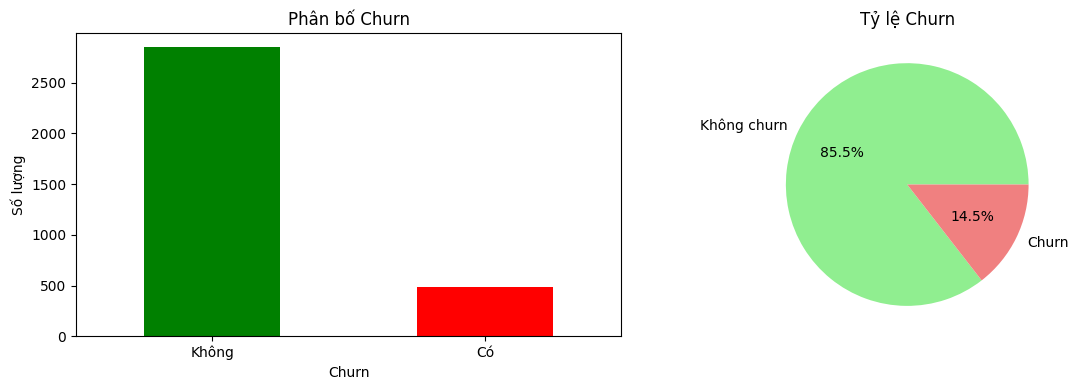

In [78]:
# Biểu đồ phân bố Churn
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Biểu đồ cột
df["Churn"].value_counts().plot(kind="bar", ax=axes[0], color=["green", "red"])
axes[0].set_title("Phân bố Churn")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Số lượng")
axes[0].set_xticklabels(["Không", "Có"], rotation=0)

# Biểu đồ tròn
df["Churn"].value_counts().plot(kind="pie", ax=axes[1], 
                                 autopct="%1.1f%%", 
                                 colors=["lightgreen", "lightcoral"],
                                 labels=["Không churn", "Churn"])
axes[1].set_title("Tỷ lệ Churn")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

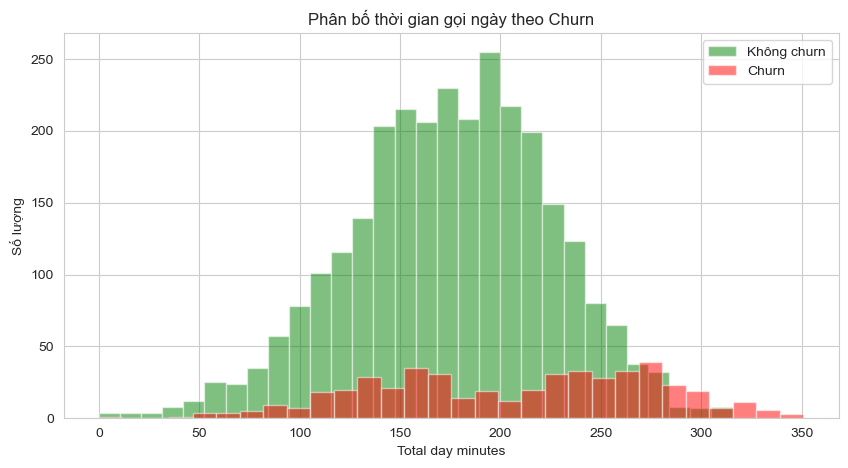

In [57]:
# Biểu đồ histogram của Total day minutes
fig, ax = plt.subplots(figsize=(10, 5))

df[df["Churn"] == 0]["Total day minutes"].hist(alpha=0.5, bins=30, 
                                                label="Không churn", color="green")
df[df["Churn"] == 1]["Total day minutes"].hist(alpha=0.5, bins=30, 
                                                label="Churn", color="red")

plt.xlabel("Total day minutes")
plt.ylabel("Số lượng")
plt.title("Phân bố thời gian gọi ngày theo Churn")
plt.legend()
plt.show()

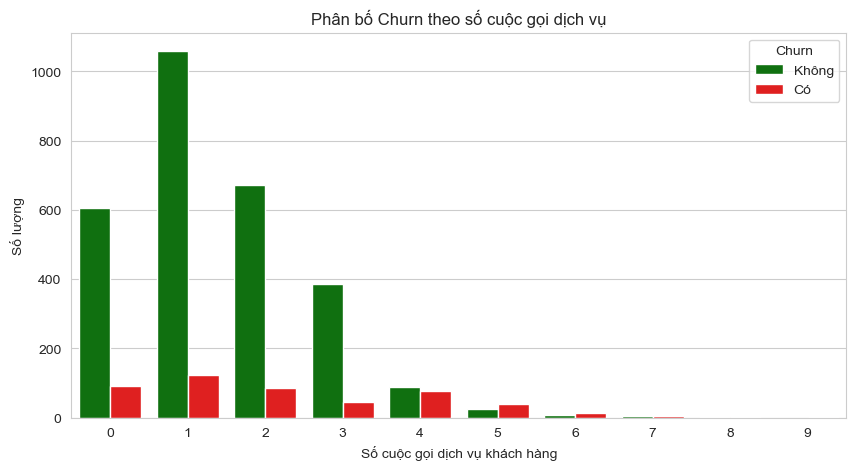

In [58]:
# Biểu đồ Churn theo Customer service calls
if HAS_SEABORN:
    plt.figure(figsize=(10, 5))
    sns.countplot(x="Customer service calls", hue="Churn", data=df,
                  palette={0: "green", 1: "red"})
    plt.title("Phân bố Churn theo số cuộc gọi dịch vụ")
    plt.xlabel("Số cuộc gọi dịch vụ khách hàng")
    plt.ylabel("Số lượng")
    plt.legend(title="Churn", labels=["Không", "Có"])
    plt.show()
else:
    # Dùng matplotlib thuần
    churn_counts = df.groupby(["Customer service calls", "Churn"]).size().unstack(fill_value=0)
    churn_counts.plot(kind="bar", figsize=(10, 5), color=["green", "red"])
    plt.title("Phân bố Churn theo số cuộc gọi dịch vụ")
    plt.xlabel("Số cuộc gọi dịch vụ khách hàng")
    plt.ylabel("Số lượng")
    plt.legend(title="Churn", labels=["Không", "Có"])
    plt.show()

## Phần 12: Tổng kết và Bài tập về nhà

### Tổng kết

Trong bài học này, chúng ta đã học:

1. **Cấu trúc dữ liệu cơ bản**: Series (1 chiều) và DataFrame (2 chiều)

2. **Đọc và khám phá dữ liệu**: `read_csv()`, `head()`, `tail()`, `shape`, `columns`, `info()`, `describe()`

3. **Sắp xếp**: `sort_values()` theo một hoặc nhiều cột

4. **Lập chỉ mục và truy xuất**: Boolean indexing, `loc`, `iloc`

5. **Áp dụng hàm**: `apply()`, `map()`, `replace()`

6. **Nhóm dữ liệu**: `groupby()`, `agg()`

7. **Bảng tổng hợp**: `crosstab()`, `pivot_table()`

8. **Biến đổi DataFrame**: Thêm cột, xóa cột/hàng với `drop()`

### Những điểm quan trọng cần nhớ

- EDA là bước quan trọng trước khi xây dựng mô hình học máy
- Luôn kiểm tra kích thước, kiểu dữ liệu và giá trị thiếu của dữ liệu
- Baseline đơn giản giúp đánh giá hiệu quả của các mô hình phức tạp
- Trực quan hóa giúp phát hiện các mẫu và mối quan hệ trong dữ liệu

### Bài tập về nhà

Sử dụng bộ dữ liệu telecom_churn, hãy hoàn thành các bài tập sau:

**Bài 1**: Tìm 10 bang có tỷ lệ churn cao nhất.

**Bài 2**: Tính tổng cước phí (Total charge = Total day charge + Total eve charge + Total night charge + Total intl charge) và tìm xem nhóm khách hàng churn có tổng cước phí trung bình cao hơn hay thấp hơn nhóm không churn.

**Bài 3**: Tạo một biến mới "High usage" = True nếu Total day minutes > 200, ngược lại = False. Sau đó tạo bảng chéo giữa "High usage" và "Churn".

**Bài 4**: Sử dụng pivot_table để tính tỷ lệ churn trung bình theo Area code và Voice mail plan.

In [ ]:
# Bài 1: Viết code của bạn ở đây


In [ ]:
# Bài 2: Viết code của bạn ở đây


In [ ]:
# Bài 3: Viết code của bạn ở đây


In [ ]:
# Bài 4: Viết code của bạn ở đây


## Tài liệu tham khảo

1. [mlcourse.ai - Exploratory data analysis with Pandas](https://mlcourse.ai/book/topic01/topic01_pandas_data_analysis.html)
2. [Pandas Official Documentation](https://pandas.pydata.org/docs/)
3. [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
4. [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)